# Create train and test from dataset

Use 90% of images as train data and 10% of images as test data

In [27]:
import os
import shutil
import random

In [28]:
# Path to your dataset directory
dataset_dir = 'E:\\dataset\\cattle\\Indian_bovine_breeds'  # Replace with your actual path

target_dir = 'E:\\AI\\freerolls\\dataset'

# Create train/test directories
train_dir = os.path.join(target_dir, 'train')
test_dir = os.path.join(target_dir, 'test')
os.makedirs(train_dir, exist_ok=True)  # Create if not exist
os.makedirs(test_dir, exist_ok=True)


In [12]:
# Get category directories
category_dirs = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# Process each category
for category_dir in category_dirs:
    category_path = os.path.join(dataset_dir, category_dir)
    image_files = [f for f in os.listdir(category_path)]  # Adjust for your image formats

    # Shuffle images randomly
    random.shuffle(image_files)

    # Calculate number of images for testing (10%)
    num_test_images = int(0.10 * len(image_files))

    # Move test images
    for image_file in image_files[:num_test_images]:
        src_path = os.path.join(category_path, image_file)
        dst_path = os.path.join(test_dir, category_dir, image_file)
        os.makedirs(os.path.join(test_dir, category_dir), exist_ok=True) # Create category folder in test dir if not exist
        shutil.copy(src_path, dst_path)

    # Move remaining train images
    for image_file in image_files[num_test_images:]:
        src_path = os.path.join(category_path, image_file)
        dst_path = os.path.join(train_dir, category_dir, image_file)
        os.makedirs(os.path.join(train_dir, category_dir), exist_ok=True)
        shutil.copy(src_path, dst_path)

    # The rest remain in the train folder (no need to move explicitly)
    print(f"Processed category: {category_dir}")

Processed category: Alambadi
Processed category: Amritmahal
Processed category: Ayrshire
Processed category: Banni
Processed category: Bargur
Processed category: Bhadawari
Processed category: Brown_Swiss
Processed category: Dangi
Processed category: Deoni
Processed category: Gir
Processed category: Guernsey
Processed category: Hallikar
Processed category: Hariana
Processed category: Holstein_Friesian
Processed category: Jaffrabadi
Processed category: Jersey
Processed category: Kangayam
Processed category: Kankrej
Processed category: Kasargod
Processed category: Kenkatha
Processed category: Kherigarh
Processed category: Khillari
Processed category: Krishna_Valley
Processed category: Malnad_gidda
Processed category: Mehsana
Processed category: Murrah
Processed category: Nagori
Processed category: Nagpuri
Processed category: Nili_Ravi
Processed category: Nimari
Processed category: Ongole
Processed category: Pulikulam
Processed category: Rathi
Processed category: Red_Dane
Processed categor

# Create function for class mapping

In [13]:
def get_class_mapping(path):
    """
    Creates a class mapping dictionary from folder names in ascending order.

    Args:
        path (str): The path to the directory containing class folders.

    Returns:
        dict: A dictionary mapping class folder names to integer indices.
    """

    class_folders = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    class_folders.sort()  # Sort folder names in ascending order

    class_mapping = {}
    for index, folder_name in enumerate(class_folders):
        class_mapping[folder_name] = index

    return class_mapping

Get class_mapping

In [14]:
class_mapping = get_class_mapping(dataset_dir)
class_mapping

{'Alambadi': 0,
 'Amritmahal': 1,
 'Ayrshire': 2,
 'Banni': 3,
 'Bargur': 4,
 'Bhadawari': 5,
 'Brown_Swiss': 6,
 'Dangi': 7,
 'Deoni': 8,
 'Gir': 9,
 'Guernsey': 10,
 'Hallikar': 11,
 'Hariana': 12,
 'Holstein_Friesian': 13,
 'Jaffrabadi': 14,
 'Jersey': 15,
 'Kangayam': 16,
 'Kankrej': 17,
 'Kasargod': 18,
 'Kenkatha': 19,
 'Kherigarh': 20,
 'Khillari': 21,
 'Krishna_Valley': 22,
 'Malnad_gidda': 23,
 'Mehsana': 24,
 'Murrah': 25,
 'Nagori': 26,
 'Nagpuri': 27,
 'Nili_Ravi': 28,
 'Nimari': 29,
 'Ongole': 30,
 'Pulikulam': 31,
 'Rathi': 32,
 'Red_Dane': 33,
 'Red_Sindhi': 34,
 'Sahiwal': 35,
 'Surti': 36,
 'Tharparkar': 37,
 'Toda': 38,
 'Umblachery': 39,
 'Vechur': 40}

# Training data

In [15]:
import numpy as np
import cv2
import os
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt

In [16]:
width = 224
num_classes = 41
train_path = 'E:\\AI\\freerolls\\dataset\\train/'
test_path = 'E:\\AI\\freerolls\\dataset\\test/'
train_img = [train_path+f for f in listdir(train_path)]
test_img = [test_path+f for f in listdir(test_path)]

In [29]:
train_img,test_img

(['E:\\AI\\freerolls\\dataset\\train/Alambadi',
  'E:\\AI\\freerolls\\dataset\\train/Amritmahal',
  'E:\\AI\\freerolls\\dataset\\train/Ayrshire',
  'E:\\AI\\freerolls\\dataset\\train/Banni',
  'E:\\AI\\freerolls\\dataset\\train/Bargur',
  'E:\\AI\\freerolls\\dataset\\train/Bhadawari',
  'E:\\AI\\freerolls\\dataset\\train/Brown_Swiss',
  'E:\\AI\\freerolls\\dataset\\train/Dangi',
  'E:\\AI\\freerolls\\dataset\\train/Deoni',
  'E:\\AI\\freerolls\\dataset\\train/Gir',
  'E:\\AI\\freerolls\\dataset\\train/Guernsey',
  'E:\\AI\\freerolls\\dataset\\train/Hallikar',
  'E:\\AI\\freerolls\\dataset\\train/Hariana',
  'E:\\AI\\freerolls\\dataset\\train/Holstein_Friesian',
  'E:\\AI\\freerolls\\dataset\\train/Jaffrabadi',
  'E:\\AI\\freerolls\\dataset\\train/Jersey',
  'E:\\AI\\freerolls\\dataset\\train/Kangayam',
  'E:\\AI\\freerolls\\dataset\\train/Kankrej',
  'E:\\AI\\freerolls\\dataset\\train/Kasargod',
  'E:\\AI\\freerolls\\dataset\\train/Kenkatha',
  'E:\\AI\\freerolls\\dataset\\train/Kherig

# Data generate and Augmentation

In [30]:
from keras.preprocessing.image import ImageDataGenerator

# Set parameters Data Augmentation
datagen_train = ImageDataGenerator(
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load train from directory directory
train_generator = datagen_train.flow_from_directory(
    train_path,
    target_size=(width, width),
    batch_size=32,
    class_mode='categorical'
)

# Set parameters Data Augmentation
datagen_test = ImageDataGenerator()

# Load test from directory directory
test_generator = datagen_test.flow_from_directory(
    test_path,
    target_size=(width, width),
    batch_size=32,
    class_mode='categorical'
)


Found 5871 images belonging to 41 classes.
Found 1089 images belonging to 41 classes.


# Setup and training mode

Create new model using tranform learning from MobileNetV3Large

In [31]:
base_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet')
base_model.trainable = False
num_classes = len(class_mapping)

model = Sequential([
    base_model,
    Conv2D(224, 3, activation='relu'),
    Dense(16),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics= ['accuracy'])

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4, verbose=1, patience=50)

In [34]:
train_generator.samples // train_generator.batch_size

183

In [35]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=(test_generator),
    callbacks=[es]
)

Epoch 1/100
183/183 [==============================] - 609s 3s/step - loss: 4.3906 - accuracy: 0.1447 - val_loss: 2.8478 - val_accuracy: 0.2617
Epoch 2/100
183/183 [==============================] - 557s 3s/step - loss: 2.7245 - accuracy: 0.2995 - val_loss: 2.2610 - val_accuracy: 0.3866
Epoch 3/100
183/183 [==============================] - 614s 3s/step - loss: 2.2085 - accuracy: 0.4136 - val_loss: 1.8425 - val_accuracy: 0.4931
Epoch 4/100
183/183 [==============================] - 589s 3s/step - loss: 1.8240 - accuracy: 0.4996 - val_loss: 1.5310 - val_accuracy: 0.5794
Epoch 5/100
183/183 [==============================] - 565s 3s/step - loss: 1.5060 - accuracy: 0.5869 - val_loss: 1.3033 - val_accuracy: 0.6327
Epoch 6/100
183/183 [==============================] - 596s 3s/step - loss: 1.2775 - accuracy: 0.6354 - val_loss: 1.1284 - val_accuracy: 0.6850
Epoch 7/100
183/183 [==============================] - 588s 3s/step - loss: 1.0499 - accuracy: 0.7000 - val_loss: 0.9676 - val_accuracy:

In [36]:
model.save("./indian_bovine_breeds_v2.keras")

# Training report

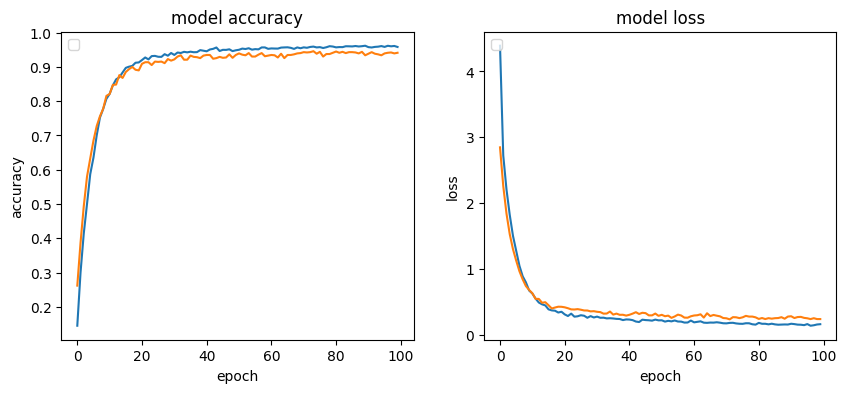

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(121),
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.subplot(122)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Testing model

In [38]:
# Get the class names in the desired order
class_names = list(class_mapping.keys())

In [39]:
testImg = [test_path+f for f in listdir(test_path)]
rimg = []
for imagePath in (testImg):
    for i,item in enumerate(listdir(imagePath)):
        file = join(imagePath, item)
        if file[-1] =='g':
            try:
                img = cv2.imread(file , cv2.COLOR_BGR2RGB)
                ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img ,(width,width))
                rimg = np.array(img)
                rimg = rimg.astype('float32')
                rimg /= 255
                rimg = np.reshape(rimg ,(1,224,224,3))
                predict = model.predict(rimg)

                # Print predict result
                probability = np.max(predict)

                # Hot encode to label
                hot_encode = np.argmax(predict)

                result = class_names[hot_encode]
                # Print path
                print('===================')
                print('probability:'+str(probability))
                print('real:'+str(item))
                print('predict:'+str(result))
                print('-------------------')
            except cv2.error as e:
                print(f"Error processing image {file}: {e}")

            except IndexError as e:
                print(f"Index error for image {file}: {e}")

            except Exception as e:  # Catch any other unexpected errors
                print(f"Unexpected error for image {file}: {e}")

            # # Print predict result on image
            # plt.title(str(result) + ': ' + str(probability))


            # plt.imshow(ori)
            # plt.show()

1/1 [==============================] - 1s 1s/step
probability:0.76063406
real:Alambadi_10.png
predict:Jaffrabadi
-------------------
1/1 [==============================] - 0s 37ms/step
probability:0.7523749
real:Alambadi_13.png
predict:Jaffrabadi
-------------------
1/1 [==============================] - 0s 41ms/step
probability:0.8322865
real:Alambadi_16.jpg
predict:Jaffrabadi
-------------------
1/1 [==============================] - 0s 42ms/step
probability:0.8163907
real:Alambadi_3.png
predict:Jaffrabadi
-------------------
1/1 [==============================] - 0s 39ms/step
probability:0.84087706
real:Alambadi_31.png
predict:Jaffrabadi
-------------------
1/1 [==============================] - 0s 42ms/step
probability:0.3332678
real:Alambadi_36.png
predict:Jaffrabadi
-------------------
1/1 [==============================] - 0s 37ms/step
probability:0.6920593
real:Alambadi_4.png
predict:Jaffrabadi
-------------------
1/1 [==============================] - 0s 38ms/step
probability: